# Gradient Descent

In [ ]:
y = X*theta

## Linear Regression

Regression is a supervised algorithm to make prediction based on continous y values.  

For example, given the following data:

| | Egg price  | Gold price    | Oil price   | GDP   |
|---:|:-------------|:-----------|:------|:------|
| 1 | 3  | 100       | 4   | 21   |
| 2 | 4  | 500    | 7   | 43     |

We want to use egg price, gold price and oil price to predict GDP.  We called egg price, gold price, oil price **features** or $\mathbf{X}$. We called what we want to predict **labels** or **targets** or $\mathbf{y}$.  Each row is called **sample** or **observation**.  

### Notations and Terms

We shall use the following notations in our course.  

- $x_j^{(i)}$ represents the i-th sample, and j-th feature. For example, $x_1^{(1)}$ denote egg price of the first sample (i.e., 3), $x_2^{(1)}$ for gold price of the first sample (i.e., 100), and $x_3^{(1)}$ for oil price of the first sample (i.e., 4).  

- Bold captial $\mathbf{X}$ denotes the whole **matrix** of features with $m$ rows of samples and $n$ columns of features.  The **shape** of $X$ is $(m, n)$.  

- Bold lowercase $\mathbf{x}$ denotes the single **vector** (i.e., column) of feature.  Note that any vector is by default a column vector of shape $(?, )$ where ? represents a whole number.  To represent a row vector, we denote as $\mathbf{x}^\top$

- $y^{(i)}$ represents the **targets/labels** of the i-th sample, and $\mathbf{y}$ refers to the whole **vector** of targets with **shape** of $(m, )$


### Hypothesis Function

**Hypothesis function** maps given input $\mathbf{X}$ to predicted $\mathbf{y}$.  We must **learn**/**train** this function.  To differentiate between actual and predicted $\mathbf{y}$, we commonly called predicted $\mathbf{y}$ as $\hat{\mathbf{y}}$ (read as yhat).

For linear regression, the hypothesis function (denoted as $h_{\theta}(x)$) which means $h$ depends on $x$ parametized by $\theta$ is defined as followed.  

\begin{align*}
h_\theta(x^{(i)}) &= \theta_0 + \theta_1x^{(i)}_1 + \theta_2x^{(i)}_2 + \cdots + \theta_nx^{(i)}_n \tag{A} \\
&= \sum_{j=0}^n \theta_jx^{(i)}_j  \tag{B} \\
&= \boldsymbol{\theta}^T \mathbf{x} \tag{C} \\
\mathbf{h} &= \mathbf{X}\boldsymbol{\theta} \tag{D}
\end{align*}

Here $\theta$ are called **parameters** or **weights** or **coefficients** that parameterize the linear mappings from $\mathbf{X}$ -> $\mathbf{y}$.  Also, we commonly don't write equations in the (A) form.  We called (B) form as the **summation** form, (C) as the **vectorized** form where $\theta$ is of shape (n, 1) and $\mathbf{x}$ is also of shape (n, 1), and (D) as the **matrix** form which combines all samples, where $\mathbf{X}$ is of shape (m, n) and $\theta$ is of shape (n, 1).  We like to write as (D) because it's easy to implement.

Note:  when $\theta_0$ exists, $\mathbf{X}$ will be of shape (m, n+1), and $\theta$ will be of shape (n+1, 1)

The resulting hypothesis function is called **model**.  The process is called **training** the model.  The latter process of testing the model on test set is called **inference**.

### How to find the best $\theta$ ==> Gradient Descent

How do we learn the best parameters $\theta$?  

First, we must define a **loss/objective function** (denoted as $J$) that measures, for a given $\theta$, how close $h(\mathbf{x}^{(i)})$ are to the corresponding $\mathbf{y}^{(i)}$.  :

$$J(\theta) = \frac{1}{2}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2$$

Note that $\frac{1}{2}$ is simply chosen for latter mathematical convenience.

We want to choose $\theta$ so as to minimize $J(\theta)$.  Such process is called **optimization**.

$$\theta^* = \argmin_\theta J(\theta)$$

One very successful optimization algorithm is called **gradient descent** algorithm, which is based on updating theta based on the **derivatives** (we also called **gradient**).   **Why gradient descent works?**  

This figure illustrates why:



### Formal Definition

We start with some random $\theta$, and repeatedly performs the update:

$$\theta_j := \theta_j - \alpha * \frac{\partial J}{\partial \theta_j}$$


This update is simultaneously performed for all values of $j=0, 1, \cdots, n$ (if you forget, $j$ here refers to each feature :-).  Here, $\alpha$ is called the **learning rate (lr)**, ranging from 0 to 1.  Commonly, we tried 0.001 as default, and this value must be manually handpicked.  Any parameters such as learning rate are called **hyperparameters**.

In order to implement this algorithm, we have to find the **partial derivative of the loss function in respect to each $\theta_j$**.  Let's try the partial derivative of our loss function in respect to $\theta_j$.  Also, let's first work it out for only one training example first as follows:

$$
\begin{aligned}
\frac{\partial J}{\partial \theta_j} &= \frac{\partial}{\partial \theta_j} \frac{1}{2}(h_\theta(x) - y)^2 \\
&= 2 * \frac{1}{2} (h_\theta(x) - y) * \frac{\partial}{\partial \theta_j} (h_\theta(x) - y) \\
&= 2 * \frac{1}{2} (h_\theta(x) - y) * \frac{\partial}{\partial \theta_j} \big(\sum_{i=0}^n \theta_ix_i - y\big) \\
&= (h_\theta(x) - y)x_j \\
\end{aligned}
$$

<!-- This rule has several properties that seem natural and intuitive. For instance, the magnitude of the update is proportional to the **error** term $h_\theta(x) - y$; thus, for instance, if we are encountering a training example on which our prediction nearly matches the actual value of $y^{(i)}$, then we find that there is little need to change the parameters; in contrast, a larger change to the parameters will be made if our prediction has a large error (i.e., if it is very far from $y^{(i)}$).
 -->

To modify the update rule for whole training example, we revise the update rule to include the summation as

$$\theta_j := \theta_j - \alpha * \sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \tag{for every $j$}$$  

or
## vectorized format

$$\theta = \theta - \alpha * \mathbf{X}^\top (\mathbf{h} - \mathbf{y})$$

Since this gradient descent calculates gradient using every example in the entire training set, we called this as **batch gradient descent**.

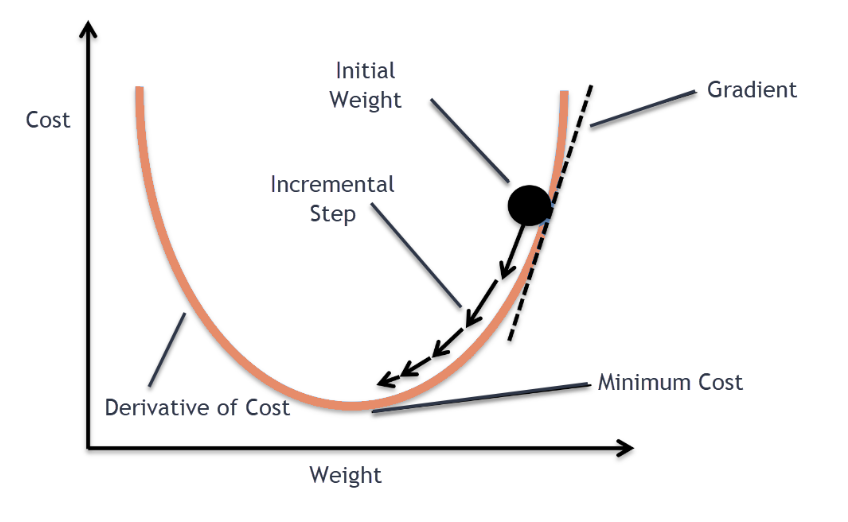

In [ ]:

from IPython.display import Image, display

display(Image(filename='/content/gradient.png', width=500))

## Implementation
$\mathbf{}$
The gradient descent has the following steps:


1. Prepare your data
    - add intercept
    - $\mathbf{X}$ and $\mathbf{y}$ and $\mathbf{w}$ in the right shape
        - $\mathbf{X}$ -> $(m, n)$
        - $\mathbf{y}$ -> $(m, )$
        - $\mathbf{w}$ -> $(n, )$
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict and calculate the loss
    - The loss function is the mean squared error
    $$J = \frac{(\mathbf{h}-\mathbf{y})^2}{2}$$
    where $\mathbf{h}$ is simply
    $$ \mathbf{h} = X\boldsymbol{\theta} $$
3. Calculate the gradient based on the loss
    - The gradient of the loss function is
    $$\frac{\partial J}{\partial \theta_j} = X^\top(\mathbf{h} - \mathbf{y})$$
4. Update the theta with this update rule
    $$\theta = \theta - \alpha * \mathbf{X}^\top (\mathbf{h} - \mathbf{y})$$
    where $\alpha$ is a typical learning rate range between 0 and 1
5. Loop 2-4 until `max_iter` is reached, or the difference between old loss and new loss are smaller than some predefined threshold tolerance (tol)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


## 1. Prepare data

### 1.1 Get your X and y in the right shape

In [ ]:
# 1. Let's load some diabetes data
# as our regression case study
from sklearn.datasets import load_diabetes


diabetes = load_diabetes()

# print(diabetes)
print("Features: ", diabetes.feature_names)

Features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
 X= diabetes.data
X.shape #number of samples, number of features

(442, 10)

In [ ]:
X = diabetes.data
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [ ]:
y = diabetes.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
m = X.shape[0]  #number of samples
n = X.shape[1]  #number of features
print(m, n)

442 10


In [ ]:
y.shape

(442,)

In [ ]:
# number of rows in X is the same as number of rows in y
# because so we have yhat for all y
assert m == y.shape[0]

## Train Test Split your data

In [ ]:
# what is the appropriate size for test data
# 70/30 (small dataset); 80/20 (medium dataset); 90/10 (large dataset);
# why large dataset, can set test size to 10, because
# 10% of large dataset is already enough for testing accuracy

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

assert len(X_train)  == len(y_train)
assert len(X_test)   == len(y_test)

## Feature scale your data to reach faster convergence

In [ ]:
# I want to standardize my data so that mean is 0, variance is 1
# average across each feature, NOT across each sample
# Why we need to standardize
# Because standardizing usually allows us to reach convergence faster
# Why -> because the values are within smaller range
# Thus, the gradients are also within limited range, and NOT go crazy

from sklearn.preprocessing import StandardScaler

# 1. StandardScaler.fit(X)  #this scaler (or self) knows the mean and std so now
# it knows how to transform data
# 2  X = StandardScaler.transform(X)  #not in place; will return something


# 1. StandardScaler.fit_transform(X) -> 1 and 2 sequentially

# create an object of StandardScaler
# StandardScaler is a class
# scaler is called instance/object

# ALMOST always, feature scale your data using normalization or standardization
# If you assume your data is gaussian, use standardization, otherwise, you do the normalization (x-min)/(max-min)

scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

#Note: you MUST split first, before scale....if not, you will get data leakage

### Add intercepts

In [ ]:


# y = theta X + intecept

# y = mx+b


#X = [ 2 3     @  [w1
#      4 6         w2]
#      9 1
#      10 2 ]



#X = [1 2 3     @  [w0
#     1 4 6         w1=2
#     1 9 1         w2=1]
#     1 10 2 ]

# y = w0 + 2*2 + 3*1

# X @ W = [7
#          14
#          22]

# shape became
# X (m, n+1)
# w (n+1, 1)
# y (m, 1)

In [ ]:
intercept = np.ones((X_train.shape[0],1))
intercept.shape

(309, 1)

In [ ]:
# concatenate the intercept based on axis=1
X_train = np.concatenate((intercept, X_train), axis=1)
X_train

array([[ 1.        , -0.4526164 , -0.92814104, ...,  3.00338225,
         1.70128561,  1.07254788],
       [ 1.        , -0.60092866, -0.92814104, ..., -0.84340499,
        -1.31036241, -1.3333853 ],
       [ 1.        , -1.56495838,  1.07742246, ...,  0.69530991,
         1.41250274, -0.38819726],
       ...,
       [ 1.        ,  0.4372572 ,  1.07742246, ..., -0.07404754,
        -1.58407835, -0.731902  ],
       [ 1.        ,  0.58556946, -0.92814104, ..., -0.84340499,
        -0.24505301, -0.04449252],
       [ 1.        ,  1.62375532,  1.07742246, ...,  0.69530991,
        -0.02696882, -0.04449252]])

In [ ]:
intercept = np.ones((X_test.shape[0], 1))

# concatenate the intercept based on axis=1
X_test = np.concatenate((intercept, X_test), axis=1)

## 2. Fit your algorithm

### 2.1 Define your algorithm

In [ ]:
# Step 1: Prepare your data
# X_train, X_test have intercepts that are being concatenated to the data
# [1, features
#  1, features....]

# making sure our X_train has same sample size as y_train
assert X_train.shape[0] == y_train.shape[0]
X_train.shape

(309, 11)

In [ ]:
# initialize our w
# We don't have to do X.shape[1] + 1 because our X_train already has the
# intercept
# w = theta/beta/coefficients
theta = np.zeros(X_train.shape[1])
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# define the learning rate
lr = .1 #alpha

In [ ]:
# define our max_iter
# typical to call it epochs <---ml people likes to call it
max_iter = 50

In [ ]:
yhat = X_train @ theta

In [ ]:
yhat.shape

(309,)

In [ ]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
X_train.T @ (yhat - y_train)

array([-47347.        ,  -5757.3157448 ,  -1776.51788571, -14325.6581037 ,
       -10714.05206125,  -5643.71349948,  -4900.99548906,   9878.76699362,
       -11244.15469461, -13690.75095212,  -9674.08257251])

In [ ]:
from time import time

In [ ]:
start = time()

for i in range(max_iter):
  #three steps

  #1. prediction
  # yhat = X @ w
  # prediction
  # yhat (m, ) = (m, n) @ (n, )
  yhat = X_train @ theta

  #2. Calculate the gradient
  # gradient = X.T @ (h - y)
    # error (m, ) = (m, ) - (m, )
    # grad = X.T @ error
    # grad (n, ) = (n, m) @ (m, )

    # grad for each feature j
  grad = X_train.T @ (yhat - y_train)


  #3. Update the theta
  # w = w - lr * grad
  # update w
  # w (n, ) = (n, ) - scalar * (n, )
  theta = theta - lr*grad

time_taken = time() - start

print("Time Taken: ", time_taken)
print("Theta: ", theta)

Time Taken:  0.0006992816925048828
Theta:  [-3.18959244e+089 -2.30590686e+105 -1.90667922e+105 -3.18367581e+105
 -2.67107620e+105 -3.52881636e+105 -3.70584197e+105  3.12329419e+105
 -4.53601451e+105 -3.93149971e+105 -3.55847417e+105]


In [ ]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## Compute Accuracy


In [ ]:
#sum of squares error  ((yhat-yactual)**2).sum()
#mean square error
def mse(yhat, yactual):
  return ((yhat-yactual)**2).sum() /yhat.shape[0]

In [ ]:
X_test.shape

(133, 10)

In [ ]:
# we got our lovely w
# now it's time to check our accuracy
# 1. Make prediction
#yhat = h_theta(X_test, theta)
yhat = X_test @ theta

# 2. Calculate mean squared errors
mse_test = mse(yhat, y_test)

yhat_t = X_train @ theta
mse_t = mse(yhat_t, y_train)
# print the mse
print("MSE test: ", mse_test)
print("MSE train: ", mse_t)


MSE test:  4.174696809634383e+212
MSE train:  4.489419188133429e+212
